In [197]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import accuracy_score
import seaborn as sns

In [198]:
df = pd.read_csv('instagram_reach.csv')
df

df['Caption'].fillna(' ',inplace=True)
## Removing Unwanted columns
df.drop(['Unnamed: 0','S.No','USERNAME'],axis=1,inplace=True)

In [199]:
# Function that is used to vectorizing the columns
def transform_col(df_columns):
    vectorizer = CountVectorizer()

    # Fit and transform the string column into vectors
    vectorized_data = vectorizer.fit_transform(df[df_columns])

    # Convert the vectorized data to an array
    vectorized_array = vectorized_data.toarray()

    # Print the vectorized data
    for i in range(len(df)):
        df[df_columns].loc[i] = vectorized_array[i]
    df[df_columns]=np.array(df[df_columns].tolist())
        
    return df_columns


In [200]:
transform_col('Hashtags')
transform_col('Caption')

C:\Users\Raja.Balasubramani\AppData\Local\Temp\ipykernel_18604\3649085577.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df_columns].loc[i] = vectorized_array[i]


'Caption'

In [201]:
# Getting the hrs from the HH:MM:SS format

def transform_hrs(col_name):
    for i in range(len(df)):
        df[col_name].loc[i] = df[col_name].loc[i][:2]
    df[col_name] = df[col_name].astype('float')
    return df[col_name]
transform_hrs('Time since posted')

C:\Users\Raja.Balasubramani\AppData\Local\Temp\ipykernel_18604\1705972350.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col_name].loc[i] = df[col_name].loc[i][:2]


0     11.0
1      2.0
2      2.0
3      3.0
4      3.0
      ... 
95     3.0
96     3.0
97     3.0
98     3.0
99     3.0
Name: Time since posted, Length: 100, dtype: float64

C:\Users\Raja.Balasubramani\AppData\Local\Temp\ipykernel_18604\2676874989.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Likes'])


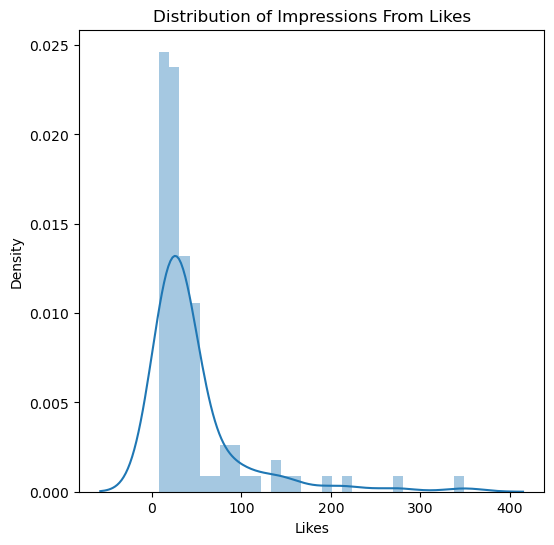

In [202]:
plt.figure(figsize=(6, 6))
plt.title("Distribution of Impressions From Likes")
sns.distplot(df['Likes'])
plt.show()

<Axes: >

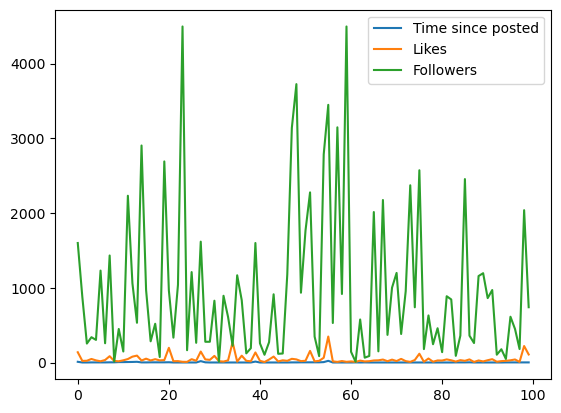

In [203]:
df[['Time since posted','Likes','Followers']].plot()

In [204]:
x = df[['Caption','Followers','Hashtags']]
y = df[['Time since posted','Likes']]

In [205]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [206]:

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [208]:
pred = rf_regressor.predict([X_test.iloc[1]])
print('Time since posted ',pred[:,0])
print('Likes ',pred[:,1])

Time since posted  [3.31]
Likes  [76.92]


C:\Users\Raja.Balasubramani\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [209]:
y_test.iloc[1]

Time since posted     2.0
Likes                46.0
Name: 91, dtype: float64